In [1]:
from sklearn.datasets import load_digits
import numpy as np
from matplotlib import pyplot as plt

4


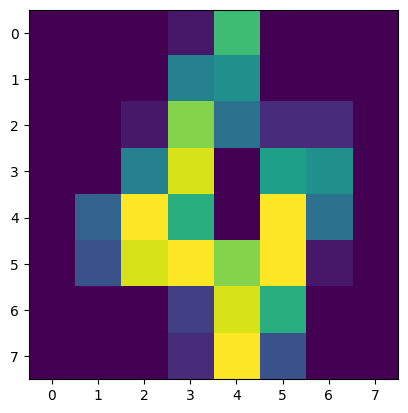

In [2]:
data =load_digits(return_X_y=False)
plt.imshow(data.images[4])
print(data.target[4])

In [3]:
X = data.data
y = data.target

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42) 

print(X_train.shape)
print(X_test)

(1437, 64)
[[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]


In [5]:

from sklearn.neighbors import KNeighborsClassifier

modelo = KNeighborsClassifier()


In [6]:
#Búsqueda por rejilla
from sklearn.model_selection import GridSearchCV

rejilla = {'n_neighbors':[3,5,7,9,11],'weights':['uniform','distance'],'metric':['euclidean','cosine','manhattan']}

modeloGridSearchCrossValidation = GridSearchCV(estimator=modelo,param_grid=rejilla,scoring='accuracy',cv=10)

modeloGridSearchCrossValidation.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
#Resultados
modeloGridSearchCrossValidation.cv_results_


{'mean_fit_time': array([0.00109236, 0.00077722, 0.00102417, 0.00103507, 0.00091209,
        0.00088274, 0.00085828, 0.00085423, 0.00081434, 0.0009907 ,
        0.00086775, 0.00081458, 0.00100789, 0.00116494, 0.00097322,
        0.00084839, 0.00076828, 0.00086401, 0.0007148 , 0.00076814,
        0.00083568, 0.00087435, 0.00107572, 0.00088904, 0.00079267,
        0.0008266 , 0.00083294, 0.00095599, 0.00068276, 0.00106668]),
 'std_fit_time': array([4.37280097e-04, 1.68522693e-04, 3.75988443e-04, 3.39617842e-04,
        1.86318230e-04, 2.04463866e-04, 2.73789882e-04, 2.20709539e-04,
        2.38756898e-04, 4.02469065e-04, 2.27508453e-04, 1.72487635e-04,
        4.89996785e-04, 4.54741769e-04, 3.59081414e-04, 1.87918650e-04,
        1.60184116e-04, 1.89994970e-04, 5.44779358e-05, 9.44975760e-05,
        2.27796356e-04, 2.78514193e-04, 2.24571203e-04, 2.80629737e-04,
        2.13070805e-04, 2.74931710e-04, 2.58737400e-04, 2.29285477e-04,
        5.69864345e-05, 3.95279109e-04]),
 'mean_scor

In [11]:
#Best score:
modeloGridSearchCrossValidation.best_score_

np.float64(0.9874757187257188)

In [12]:
mejorModelo = modeloGridSearchCrossValidation.best_estimator_
mejorModelo.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3, weights='distance')

In [13]:
y_pred = mejorModelo.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9833333333333333


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

ModuleNotFoundError: No module named 'seaborn'